<a href="https://colab.research.google.com/github/codingiamnot/PMP-2024/blob/main/Lab10/pmp_lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

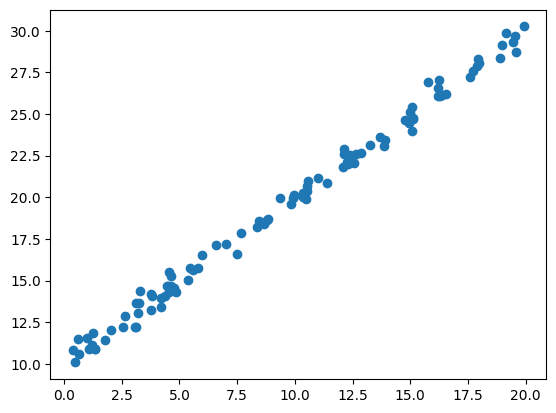

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm

panta = 1
const = 10

x = np.random.uniform(low=0, high=20, size=(100,))
y = np.random.normal(panta*x + const, 0.5)

plt.plot(x, y, "o")

In [15]:
with pm.Model() as model:
  a = pm.Normal('a', mu=0, sigma=1000)
  b = pm.Normal('b', mu=0, sigma=1000)
  err = pm.HalfCauchy('err', 5)

  rez = pm.Deterministic('rez', b + a*x)
  y_pred = pm.Normal('y_pred', mu=rez, sigma=err, observed=y)

  sample = pm.sample(1000, tune=1000, return_inferencedata=True)

Output()

Output()

In [16]:
posterior_g = sample.posterior.stack(samples={"chain", "draw"})

ansA = posterior_g['a'].mean().item()
ansB = posterior_g['b'].mean().item()

print(ansA, ansB) ###ceea ce a gasit modelul
print(panta, const) ###parametrii cu care am generat

0.9951142745503622 10.023021426074273
1 10
